# Workbook 2

This is WorkBook2, we worked toward answering the same questions in both of these workbooks, just at differet times. The data used in the file can be found in the DataFiltering folder, and all the code used for merging is in the Filtered Data.ipynb file.



In [1]:
#Importing necessary libraries

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#Read in the filtered Data
PGA2022 = pd.read_csv('PGA2022.csv')
PGA2023 = pd.read_csv('PGA2023.csv')
PGA2024 = pd.read_csv('PGA2024.csv')
PGA234 = pd.read_csv('PGA234.csv')

In [3]:
#Drop all columns that we do not need for this workbook, we keep ones relating to driving, shots gained, and accuracy.
columnsToKeep24 = ['AVG_Driv','RANK','Avg Score','AVG_SG:Tot','AVG_SGAppr','TOTAL SG:PUTTING','AVG_Birdies','TOTAL SG:T2G','%_Driv_Acc']
columnsToKeep23 = ['AVG_Driv_23','RANK_23','Avg Score_23','AVG_SG:Tot_23','AVG_SGAppr_23','TOTAL SG:PUTTING_23','AVG_Birdies_23','TOTAL SG:T2G_23','%_Driv_Acc_23']
columnsToKeep22 = ['AVG_Driv_22','RANK_22','Avg Score_22','AVG_SG:Tot_22','AVG_SGAppr_22','TOTAL SG:PUTTING_22','AVG_Birdies_22','TOTAL SG:T2G_22','%_Driv_Acc_22']

#create new data frame containing key variables related to driving.
bydrive22 = PGA234[columnsToKeep22].sort_values('AVG_Driv_22', ascending = False)
bydrive23 = PGA234[columnsToKeep23].sort_values('AVG_Driv_23', ascending = False)
bydrive24 = PGA234[columnsToKeep24].sort_values('AVG_Driv', ascending = False)

#create new data frame containing key variables related to accuracy
byacc22 = PGA234[columnsToKeep22].sort_values('%_Driv_Acc_22', ascending = False)
byacc23 = PGA234[columnsToKeep23].sort_values('%_Driv_Acc_23', ascending = False)
byacc24 = PGA234[columnsToKeep24].sort_values('%_Driv_Acc', ascending = False)

#group the avg drive column into short average and far based on percentiles
bydrive24['AVG_Driv'] = pd.qcut(bydrive24['AVG_Driv'], 
                         q=[0, 0.25, 0.75, 1], 
                         labels=['Short', 'Average', 'Far'])
bydrive23['AVG_Driv_23'] = pd.qcut(bydrive23['AVG_Driv_23'], 
                         q=[0, 0.25, 0.75, 1], 
                         labels=['Short', 'Average', 'Far'])
bydrive22['AVG_Driv_22'] = pd.qcut(bydrive22['AVG_Driv_22'], 
                         q=[0, 0.25, 0.75, 1], 
                         labels=['Short', 'Average', 'Far'])

#group the avg accuracy column into low middle high based on percentiles
byacc24['%_Driv_Acc'] = pd.qcut(bydrive24['%_Driv_Acc'], 
                         q=[0, 0.25, 0.75, 1], 
                         labels=['Low', 'Middle', 'High'])
byacc23['%_Driv_Acc_23'] = pd.qcut(bydrive23['%_Driv_Acc_23'], 
                         q=[0, 0.25, 0.75, 1], 
                         labels=['Low', 'Middle', 'High'])
byacc22['%_Driv_Acc_22'] = pd.qcut(bydrive22['%_Driv_Acc_22'], 
                         q=[0, 0.25, 0.75, 1], 
                         labels=['Low', 'Middle', 'High'])

#group this data by the avg drive distances
groupedByDrive24 = bydrive24.groupby('AVG_Driv').mean()
groupedByDrive23 = bydrive23.groupby('AVG_Driv_23').mean()
groupedByDrive22 = bydrive22.groupby('AVG_Driv_22').mean()

#group this data by the avg accuracy 
groupedByAcc24 = byacc24.groupby('%_Driv_Acc').mean()
groupedByAcc23 = byacc23.groupby('%_Driv_Acc_23').mean()
groupedByAcc22 = byacc22.groupby('%_Driv_Acc_22').mean()


print(groupedByDrive24) 
print("")
print("2023:")
print(groupedByDrive23) 
print("")
print("2022:")
print(groupedByDrive22)   

print(groupedByAcc24) 
print("")
print("2023:")
print(groupedByAcc23) 
print("")
print("2022:")
print(groupedByAcc22) 

               RANK  Avg Score  AVG_SG:Tot  AVG_SGAppr  TOTAL SG:PUTTING  \
AVG_Driv                                                                   
Short     84.640000  70.928560    0.215880    0.181880          5.083920   
Average   78.458333  70.846708    0.269542    0.104854          2.604062   
Far       63.400000  70.684920    0.450000    0.101280          2.489920   

          AVG_Birdies  TOTAL SG:T2G  %_Driv_Acc  
AVG_Driv                                         
Short        3.777200     10.009360    0.646456  
Average      3.880417     16.193667    0.611944  
Far          3.960400     28.212600    0.578480  

2023:
               RANK_23  Avg Score_23  AVG_SG:Tot_23  AVG_SGAppr_23  \
AVG_Driv_23                                                          
Short        78.480000     70.717840       0.292200       0.181880   
Average      63.854167     70.469979       0.546021       0.104854   
Far          58.600000     70.382080       0.627640       0.101280   

           

/var/folders/l2/9x7hw0zn3kz5h063d8k4wn3w0000gn/T/ipykernel_19841/2243105124.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupedByDrive24 = bydrive24.groupby('AVG_Driv').mean()
/var/folders/l2/9x7hw0zn3kz5h063d8k4wn3w0000gn/T/ipykernel_19841/2243105124.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupedByDrive23 = bydrive23.groupby('AVG_Driv_23').mean()
/var/folders/l2/9x7hw0zn3kz5h063d8k4wn3w0000gn/T/ipykernel_19841/2243105124.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current beha

In [4]:
# bar plot 1 to show the average ranks

groupbyDrive24 = pd.DataFrame(groupedByDrive24)

renamedCols = groupbyDrive24['RANK'].rename('Player Rank 2024')
renamedCols4 = groupbyDrive24['Avg Score'].rename('Average Score Per Round')



#bar plot 2 to show the average ranks

groupbyDrive23 = pd.DataFrame(groupedByDrive23)

renamedCols2 = groupbyDrive23['RANK_23'].rename('Player Rank 2023')
renamedCols5 = groupbyDrive23['Avg Score_23'].rename('Average Score Per Round')



#bar plot3 to show the average ranks

groupbyDrive22 = pd.DataFrame(groupedByDrive22)

renamedCols3 = groupbyDrive22['RANK_22'].rename('Player Rank 2022')
renamedCols6 = groupbyDrive22['Avg Score_22'].rename('Average Score Per Round')



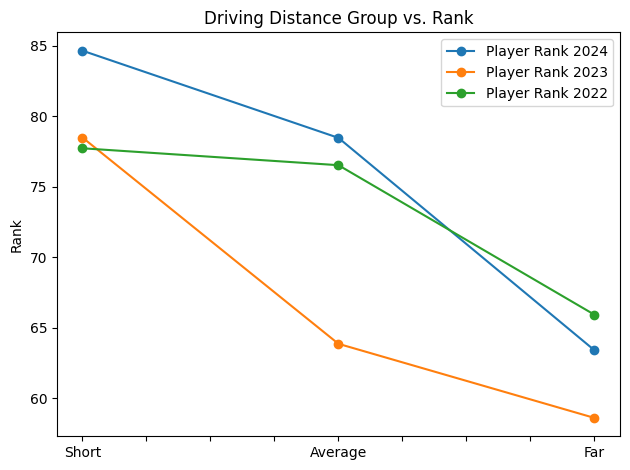

In [5]:
groupbyDrive24 = pd.DataFrame(groupedByDrive24)
groupbyDrive23 = pd.DataFrame(groupedByDrive23)
groupbyDrive22 = pd.DataFrame(groupedByDrive22)

renamed24 = groupbyDrive24['RANK'].rename('Player Rank 2024')
renamed23 = groupbyDrive23['RANK_23'].rename('Player Rank 2023')
renamed22 = groupbyDrive22['RANK_22'].rename('Player Rank 2022')

# Concatenate the data for bar plot
bar_combined = pd.concat([renamed24, renamed23, renamed22], axis=1)

#make the lineplot dataframe
line_combined = bar_combined


# Line plot combining data from 2022, 2023, and 2024
line_combined.plot(kind='line', marker='o')
plt.title('Driving Distance Group vs. Rank')
plt.ylabel('Rank')

plt.tight_layout()
plt.show()


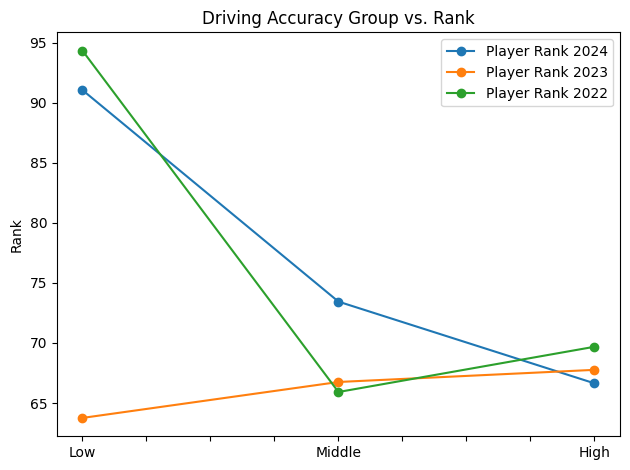

In [6]:
groupbyAcc24 = pd.DataFrame(groupedByAcc24)
groupbyAcc23 = pd.DataFrame(groupedByAcc23)
groupbyAcc22 = pd.DataFrame(groupedByAcc22)

renamed244 = groupbyAcc24['RANK'].rename('Player Rank 2024')
renamed233 = groupbyAcc23['RANK_23'].rename('Player Rank 2023')
renamed222 = groupbyAcc22['RANK_22'].rename('Player Rank 2022')  # Corrected to groupbyAcc22

#concat the data for the bar plot
bar_combined1 = pd.concat([renamed244, renamed233, renamed222], axis=1)

#make the lineplot dataframe
line_combined1 = bar_combined1

# Line plot combining data from 2022, 2023, and 2024
line_combined1.plot(kind='line', marker='o')
plt.title('Driving Accuracy Group vs. Rank')
plt.ylabel('Rank')

plt.tight_layout()
plt.show()

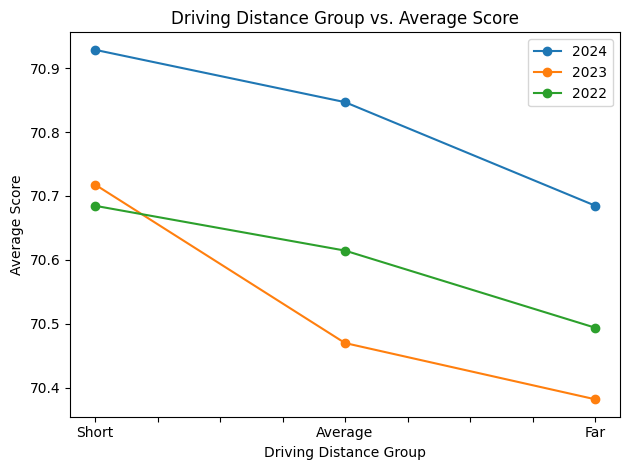

In [7]:
groupbyDrive24 = pd.DataFrame(groupedByDrive24)
groupbyDrive23 = pd.DataFrame(groupedByDrive23)
groupbyDrive22 = pd.DataFrame(groupedByDrive22)

renamed242 = groupbyDrive24['Avg Score'].rename('2024')
renamed232 = groupbyDrive23['Avg Score_23'].rename('2023')
renamed222 = groupbyDrive22['Avg Score_22'].rename('2022')

# Concatenate the data for bar plot
bar_combined2 = pd.concat([renamed242, renamed232, renamed222], axis=1)

#make the lineplot dataframe
line_combined2 = bar_combined2


# Line plot combining data from 2022, 2023, and 2024
line_combined2.plot(kind='line', marker='o')
plt.title('Driving Distance Group vs. Average Score')
plt.ylabel('Average Score')
plt.xlabel('Driving Distance Group')
plt.tight_layout()
plt.show()


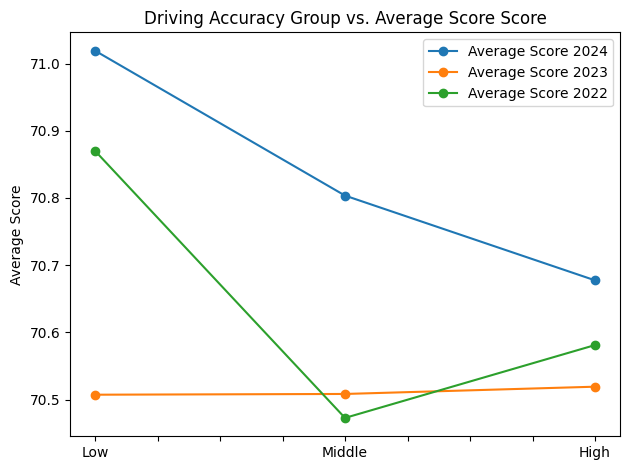

In [8]:


groupbyAcc24 = pd.DataFrame(groupedByAcc24)
groupbyAcc23 = pd.DataFrame(groupedByAcc23)
groupbyAcc22 = pd.DataFrame(groupedByAcc22)

renamed244 = groupbyAcc24['Avg Score'].rename('Average Score 2024')
renamed233 = groupbyAcc23['Avg Score_23'].rename('Average Score 2023')
renamed222 = groupbyAcc22['Avg Score_22'].rename('Average Score 2022') 

# Concatenate the data for bar plot
bar_combined3 = pd.concat([renamed244, renamed233, renamed222], axis=1)

#make the lineplot dataframe
line_combined3 = bar_combined3

# Line plot combining data from 2022, 2023, and 2024
line_combined3.plot(kind='line', marker='o')
plt.title('Driving Accuracy Group vs. Average Score Score')
plt.ylabel('Average Score')

plt.tight_layout()
plt.show()

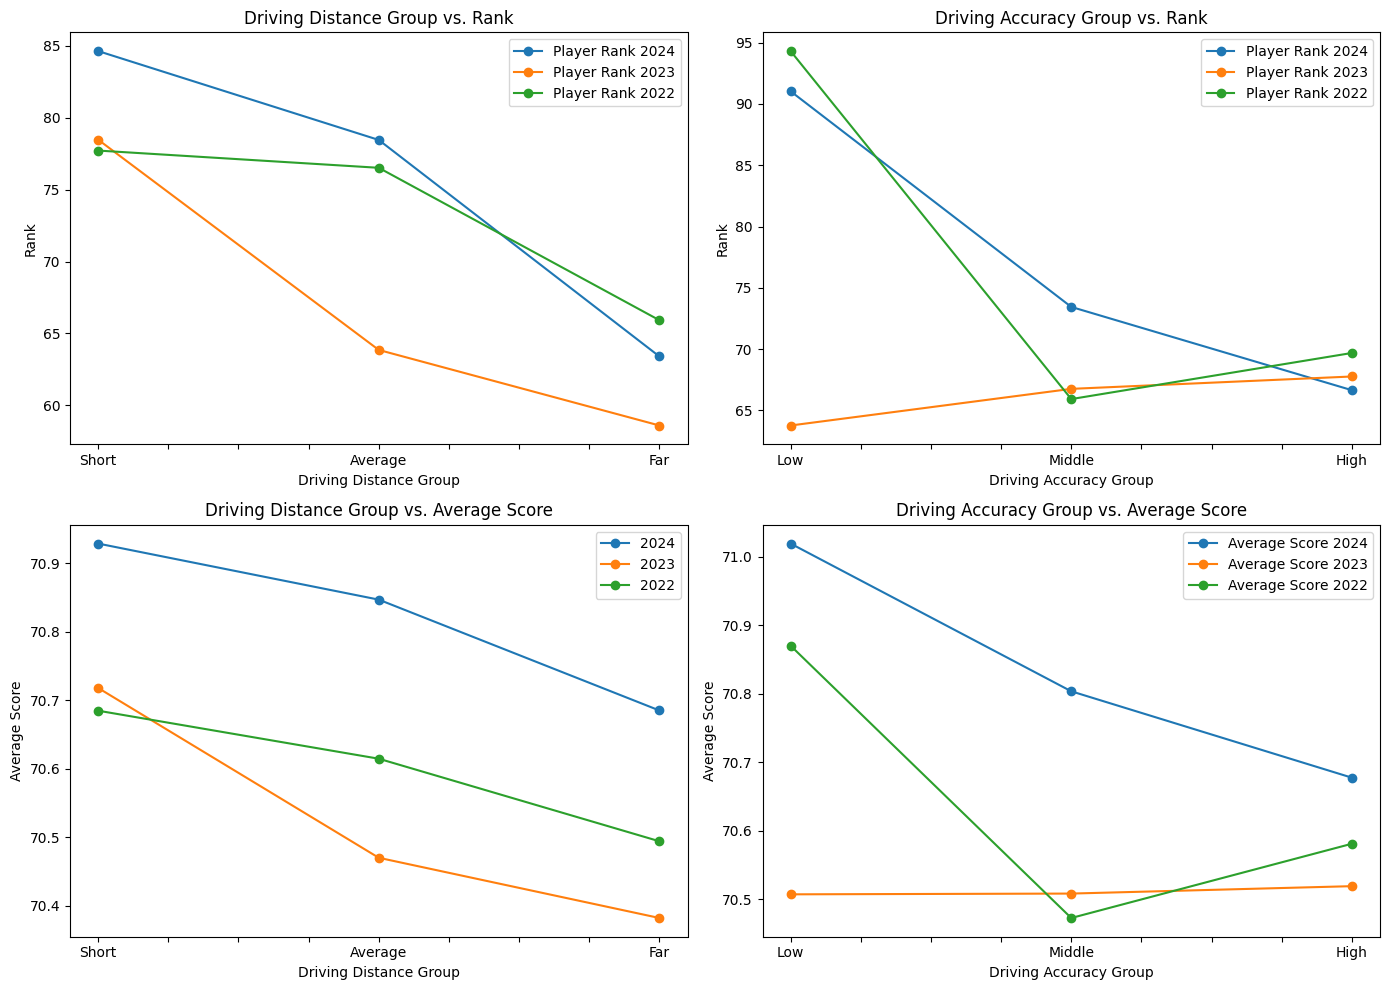

In [9]:
#Setting labels for the plots we have created above

fig, axs = plt.subplots(2, 2, figsize=(14, 10))


line_combined.plot(kind='line', marker='o', ax=axs[0, 0])
axs[0, 0].set_title('Driving Distance Group vs. Rank')
axs[0, 0].set_ylabel('Rank')
axs[0, 0].set_xlabel('Driving Distance Group')


line_combined1.plot(kind='line', marker='o', ax=axs[0, 1])
axs[0, 1].set_title('Driving Accuracy Group vs. Rank')
axs[0, 1].set_ylabel('Rank')
axs[0, 1].set_xlabel('Driving Accuracy Group')


line_combined2.plot(kind='line', marker='o', ax=axs[1, 0])
axs[1, 0].set_title('Driving Distance Group vs. Average Score')
axs[1, 0].set_ylabel('Average Score')
axs[1, 0].set_xlabel('Driving Distance Group')


line_combined3.plot(kind='line', marker='o', ax=axs[1, 1])
axs[1, 1].set_title('Driving Accuracy Group vs. Average Score')
axs[1, 1].set_ylabel('Average Score')
axs[1, 1].set_xlabel('Driving Accuracy Group')


plt.tight_layout()
plt.show()